In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.plotting import plotSeverity                   

In [2]:
df = pd.read_csv('data/US_Accidents_Dec20.csv')
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [101]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
for col in df.columns.tolist():
    print("{} : {}% nan".format(col,(df[col].isnull().sum()/len(df[col]))*100))

ID : 0.0% nan
Source : 0.0% nan
TMC : 35.819239553733794% nan
Severity : 0.0% nan
Start_Time : 0.0% nan
End_Time : 0.0% nan
Start_Lat : 0.0% nan
Start_Lng : 0.0% nan
End_Lat : 64.1807604462662% nan
End_Lng : 64.1807604462662% nan
Distance(mi) : 0.0% nan
Description : 4.7252938601185436e-05% nan
Number : 63.50674453005889% nan
Street : 0.0% nan
Side : 0.0% nan
City : 0.003236826294181202% nan
County : 0.0% nan
State : 0.0% nan
Zipcode : 0.03052539833636579% nan
Country : 0.0% nan
Timezone : 0.1090361558222354% nan
Airport_Code : 0.21200030903421843% nan
Weather_Timestamp : 1.4800565428663301% nan
Temperature(F) : 2.124019590123285% nan
Wind_Chill(F) : 44.79580942039309% nan
Humidity(%) : 2.255548144719685% nan
Pressure(in) : 1.8046842310564741% nan
Visibility(mi) : 2.331176472950882% nan
Wind_Direction : 1.9754327246918577% nan
Wind_Speed(mph) : 11.324781023975905% nan
Precipitation(in) : 48.80257509614201% nan
Weather_Condition : 2.324442929200213% nan
Amenity : 0.0% nan
Bump : 0.0% na

In [4]:
df = df.drop(['Wind_Chill(F)','End_Lng','End_Lat','Number','TMC'],axis=1)

In [5]:
totalSize = len(df)
noNanDf = df.dropna()
noNanSize = len(noNanDf)
print('With no nans, we retain: '(noNanSize/totalSize)*100)

49.61575091652981


In [6]:
for col in df.columns.tolist():
    print("{} : {}% nan".format(col,(df[col].isnull().sum()/len(df[col]))*100))

ID : 0.0% nan
Source : 0.0% nan
Severity : 0.0% nan
Start_Time : 0.0% nan
End_Time : 0.0% nan
Start_Lat : 0.0% nan
Start_Lng : 0.0% nan
Distance(mi) : 0.0% nan
Description : 4.7252938601185436e-05% nan
Street : 0.0% nan
Side : 0.0% nan
City : 0.003236826294181202% nan
County : 0.0% nan
State : 0.0% nan
Zipcode : 0.03052539833636579% nan
Country : 0.0% nan
Timezone : 0.1090361558222354% nan
Airport_Code : 0.21200030903421843% nan
Weather_Timestamp : 1.4800565428663301% nan
Temperature(F) : 2.124019590123285% nan
Humidity(%) : 2.255548144719685% nan
Pressure(in) : 1.8046842310564741% nan
Visibility(mi) : 2.331176472950882% nan
Wind_Direction : 1.9754327246918577% nan
Wind_Speed(mph) : 11.324781023975905% nan
Precipitation(in) : 48.80257509614201% nan
Weather_Condition : 2.324442929200213% nan
Amenity : 0.0% nan
Bump : 0.0% nan
Crossing : 0.0% nan
Give_Way : 0.0% nan
Junction : 0.0% nan
No_Exit : 0.0% nan
Railway : 0.0% nan
Roundabout : 0.0% nan
Station : 0.0% nan
Stop : 0.0% nan
Traffic_

In [94]:
df['Precipitation(in)'].describe()

count    2.166952e+06
mean     1.244719e-02
std      1.637154e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.500000e+01
Name: Precipitation(in), dtype: float64

In [96]:
df['Severity'].describe()

count    4.232541e+06
mean     2.305035e+00
std      5.332261e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: Severity, dtype: float64

In [98]:
noNanDf['Severity'].describe()

count    2.100007e+06
mean     2.243826e+00
std      5.130401e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      4.000000e+00
Name: Severity, dtype: float64

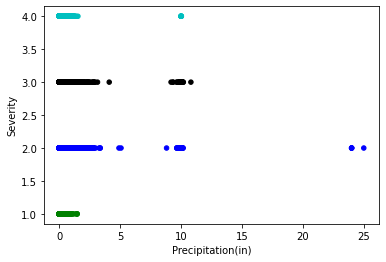

In [123]:
plotSeverity(df)

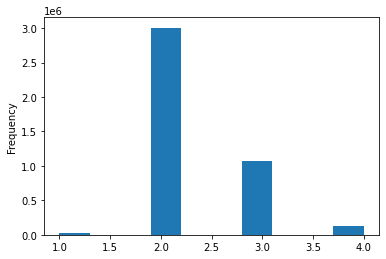

In [124]:
df['Severity'].plot.hist()

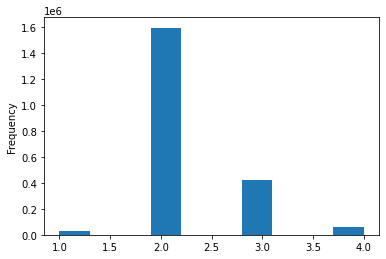

In [126]:
noNanDf['Severity'].plot.hist()